In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt 

In [3]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [8]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
x = data.data
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=45) 
## split data into 2 part 

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train) ## train data 80% or x and y 

LinearRegression()

In [ ]:
lr.coef_ ## relation of spope to x 
lr.intercept_ ## intercept 

np.float64(152.13623331746496)

In [ ]:
y_pred = lr.predict(x_test) ## predict x from y 

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
r = Ridge(alpha=100000) ## Alpha means lamdba to add in mse to get less errors 

In [20]:
r.fit(x_train,y_train)

Ridge(alpha=100000)

In [22]:

print(r.coef_)
print(r.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [23]:
y_pred1 = r.predict(x_test)

In [27]:
print('r2 Score', r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))


r2 Score -0.00042490200441935855
RMSE 70.25956272917782


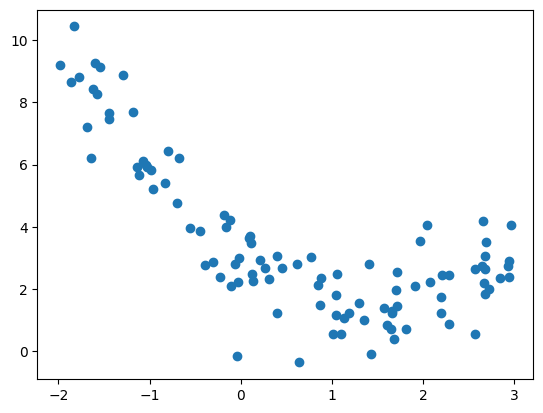

In [28]:
m = 100
x1 = 5 * np.random.rand(m,1) -2 
x2 = 0.7 * x1 ** 2 -2 * x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
  model = Pipeline([

    ('poly_feats', PolynomialFeatures(degree=16)),
    ('ridge', Ridge(alpha= alpha))
  ])

  model.fit(x1,x2)
  return model.predict(x1)

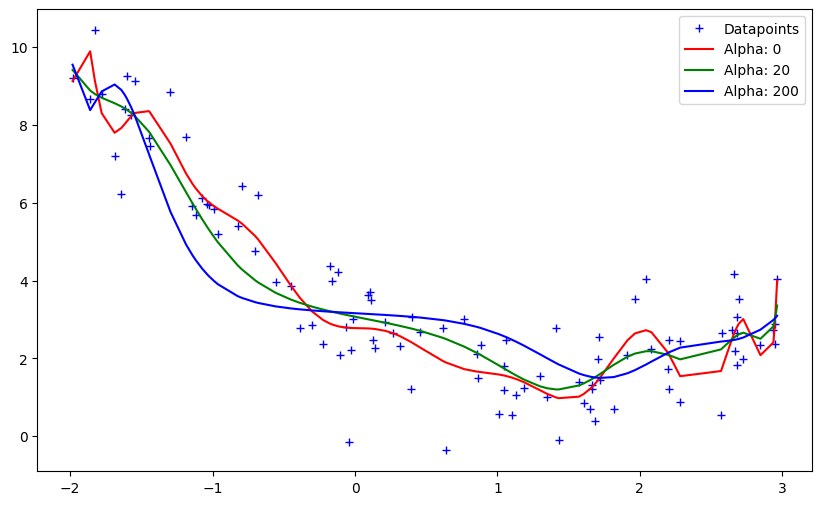

In [32]:
alphas = [0,20,200]
cs = ['r','g','b'];

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label ='Datapoints')

for alpha,c in zip(alphas,cs):
  preds = get_preds_ridge(x1,x2,alpha)
  plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label = 'Alpha: {}'.format(alpha))

plt.legend()
plt.show()